<a href="https://colab.research.google.com/github/mscsoliz/Prueba/blob/main/Copia_de_Comparacion_Clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelos de clasificacion
En este notebook veremos  un pequeño resumen de los modelos de clasificacion vistos hasta ahora, para comparar su rendimiento en una misma tarea. <br>Usaremos la tarea "brest cancer" de sklearn. Esta tarea consiste en clasificar si un tumor es maligno o benigno

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X, y = data.data, data.target
print("Objetivos:",data.target_names)
print("Dimension de X:", X.shape)
print("Dimension de Y:", y.shape)

Objetivos: ['malignant' 'benign']
Dimension de X: (569, 30)
Dimension de Y: (569,)


In [ ]:
#Dividimos el dataset en entrenamiento y test 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=.2,   # 80% train; 20% test
                                                    random_state=0) # colocamos el random seed to 0 para obtener el mismo resultado constantemente
print("Dimension de X_train:", X_train.shape)
print("Dimension de y_train:", y_train.shape)
print("Dimension de X_test:", X_test.shape)
print("Dimension de y_test:", y_test.shape)

Dimension de X_train: (455, 30)
Dimension de y_train: (455,)
Dimension de X_test: (114, 30)
Dimension de y_test: (114,)


In [ ]:
from sklearn.metrics import classification_report
import pandas as pd
"""
Definimos un metodo para calcular el rendimiento de los clasificadores
"""
def calcular_rendimiento(clf,                     # modelo de classificacion
                         imprimir_reporte=False): # por defecto no imprimir tabla reporte

  y_pred = clf.predict(X_test) # clacificar con el modelo pasado como argumento
  report = classification_report(y_test,                         # resultados verdaderos
                                y_pred,                         # resultados clasificados
                                target_names=data.target_names, # nombres de las classes
                                output_dict=True)               # retornar reporte como diccionario para acceder a los resultados
  if imprimir_reporte:
    print(classification_report(y_test,                         # resultados verdaderos
                                y_pred,                         # resultados clasificados
                                target_names=data.target_names))

  accuracy = report['accuracy']
  precision = report['macro avg']['precision']
  recall = report['macro avg']['recall']
  f1 = report['macro avg']['f1-score']
# estas variables son las que aparecen en la parte final del reporte entre parentesis
  return accuracy, precision, recall, f1

In [ ]:
# Arbol de decisiones
from sklearn.tree import DecisionTreeClassifier

DT_clf = DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
calcular_rendimiento(DT_clf, imprimir_reporte=True)

              precision    recall  f1-score   support

   malignant       0.86      0.94      0.90        47
      benign       0.95      0.90      0.92        67

    accuracy                           0.91       114
   macro avg       0.91      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114



(0.9122807017543859, 0.907563025210084, 0.9158463004128294, 0.9105180533751962)

In [ ]:
# Regresión logística
from sklearn.linear_model import LogisticRegression

# max_iter 2500 por que el modelo no convergia, varemos mas adelante cual sera el mejor valor
LR_clf = LogisticRegression(random_state=0,max_iter=5500).fit(X_train, y_train)
calcular_rendimiento(LR_clf, imprimir_reporte=True)

              precision    recall  f1-score   support

   malignant       0.90      0.98      0.94        47
      benign       0.98      0.93      0.95        67

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.95       114
weighted avg       0.95      0.95      0.95       114



(0.9473684210526315,
 0.9430438842203548,
 0.9520482692918386,
 0.9463108320251177)

In [ ]:
# kNN
from sklearn.neighbors import KNeighborsClassifier

KNN_clf = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
calcular_rendimiento(KNN_clf, imprimir_reporte=True)

              precision    recall  f1-score   support

   malignant       0.88      0.91      0.90        47
      benign       0.94      0.91      0.92        67

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114



(0.9122807017543859,
 0.9080062794348509,
 0.9126706891076533,
 0.9100378787878788)

In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB

GNB_clf = GaussianNB().fit(X_train, y_train)
calcular_rendimiento(GNB_clf, imprimir_reporte=True)

              precision    recall  f1-score   support

   malignant       0.91      0.91      0.91        47
      benign       0.94      0.94      0.94        67

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



(0.9298245614035088,
 0.9275960622419817,
 0.9275960622419817,
 0.9275960622419815)

# Intentemos mejorar el rendimiento de los modelos

In [ ]:
# Arboles de decisión
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, precision_recall_curve, auc, make_scorer, recall_score, accuracy_score, precision_score, confusion_matrix

def optimo_grid_search(clf,                           # clasificador que vamos a tunear
                       parametros,                    # parametros a tunear para el clasificador
                       refit_score='precision'):      # parametro a optimizar, por defecto precision; puede ser [precision, recall, accuracy]

   # Funcion para buscar los valores optimos de un classificador, usando GridSearch.

    scorers = {                                       # definimos los parametros para comparar el rendimiento del clasificador (para saber si mejora o no)
        'precision': make_scorer(precision_score),
        'recall': make_scorer(recall_score),
        'accuracy': make_scorer(accuracy_score)
    }
    grid_search = GridSearchCV(clf,                     # clasificador
                               parametros,              # parametros para probar en el clasificador
                               scoring=scorers,         # las metricas de comparacion
                               refit=refit_score,       # cual de las metricas usara para optimizar
                               return_train_score=True, # nos permite ver el impacto de cambiar los parametros
                               n_jobs=-1)               # -1 = usar toda la capacidad del procesador(es)
    grid_search.fit(X_train, y_train)

    print('Los mejores parametros para {} son:'.format(refit_score))
    print(grid_search.best_params_)

    return grid_search

In [ ]:
DT_clf_tuned = DecisionTreeClassifier(random_state=0)


#Podemos ver todos los parametros que se pueden
#tunear para los arboles de decision en:

#https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

# Definimos los parámetros que queremos tunear
parametros = {
    'criterion': ['gini', 'entropy'],  # El nombre correcto es 'criterion'
    'splitter': ['best', 'random'],
    'max_depth': [None, 2, 4, 6, 10, 20]
}

# Realizamos la búsqueda de hiperparámetros con GridSearchCV
grid_search = GridSearchCV(DT_clf_tuned, parametros, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# El modelo optimizado se encuentra en grid_search.best_estimator_
DT_clf_tuned = grid_search.best_estimator_

# Calculamos el rendimiento del modelo optimizado
print()
calcular_rendimiento(DT_clf_tuned, imprimir_reporte=True)


              precision    recall  f1-score   support

   malignant       0.96      0.94      0.95        47
      benign       0.96      0.97      0.96        67

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



(0.956140350877193, 0.9562020460358056, 0.9531597332486503, 0.9545997610513739)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from scipy.stats import randint
import numpy as np

# Definimos el pipeline que incluye el escalado de los datos
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Escalamos los datos
    ('log_reg', LogisticRegression(random_state=0))
])

# Definimos los parámetros para la búsqueda de hiperparámetros
parametros = {
    'log_reg__max_iter': randint(15000, 20000),  # Aumentamos las iteraciones
    'log_reg__penalty': ['l2', None],           # Usamos None en lugar de 'none'
    'log_reg__solver': ['saga', 'lbfgs']        # Solvers compatibles
}

# Realizamos la búsqueda de hiperparámetros con RandomizedSearchCV
random_search = RandomizedSearchCV(pipeline, parametros, n_iter=50, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# El modelo optimizado se encuentra en random_search.best_estimator_
LR_clf_tuned = random_search.best_estimator_

# Calculamos el rendimiento del modelo optimizado
print("Mejores parámetros encontrados:", random_search.best_params_)
calcular_rendimiento(LR_clf_tuned, imprimir_reporte=True)




Mejores parámetros encontrados: {'log_reg__max_iter': 15860, 'log_reg__penalty': 'l2', 'log_reg__solver': 'saga'}
              precision    recall  f1-score   support

   malignant       0.96      0.96      0.96        47
      benign       0.97      0.97      0.97        67

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

Mejores parámetros encontrados: {'log_reg__max_iter': 15860, 'log_reg__penalty': 'l2', 'log_reg__solver': 'saga'}
              precision    recall  f1-score   support

   malignant       0.96      0.96      0.96        47
      benign       0.97      0.97      0.97        67

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



(0.9649122807017544,
 0.9637980311209908,
 0.9637980311209908,
 0.9637980311209908)

In [ ]:
# definimos el modelo sin entrenarlo:
KNN_clf_tuned = KNeighborsClassifier()

"""
Podemos ver todos los parametros que se pueden
tunear para KNN de decision en:

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
"""

parametros = {
    'n_neighbors': [1, 3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
}

KNN_clf_tuned = optimo_grid_search(KNN_clf_tuned, parametros)
print()
calcular_rendimiento(KNN_clf_tuned, imprimir_reporte=True)

Los mejores parametros para precision son:
{'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'uniform'}

              precision    recall  f1-score   support

   malignant       0.98      0.94      0.96        47
      benign       0.96      0.99      0.97        67

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



(0.9649122807017544,
 0.9671497584541062,
 0.9606224198158145,
 0.9635549872122762)

In [ ]:

# definimos el modelo sin entrenarlo:
GNB_clf_tuned = GaussianNB().fit(X_train, y_train)

"""
Como podemos ver en:

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

El algoritmo Naive Bayes no tiene parametros que nos interese tunear; por este motivo el modelo ya se encuentra con el mejor rendimiento
"""

calcular_rendimiento(GNB_clf_tuned, imprimir_reporte=True)

              precision    recall  f1-score   support

   malignant       0.91      0.91      0.91        47
      benign       0.94      0.94      0.94        67

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



(0.9298245614035088,
 0.9275960622419817,
 0.9275960622419817,
 0.9275960622419815)

# Ahora veremos cual de los modelos es el mejor

Si tomamos en cuenta cada clase como una distribucion, podemos asumir una districubion normal para cada clase. En ese caso, un caso optimo seria el siguiente, en el que ambas distribuciones son perfectamente separables. La curva ROC en este caso sera completamnte recta y el area bajo la curva sera igual a 1

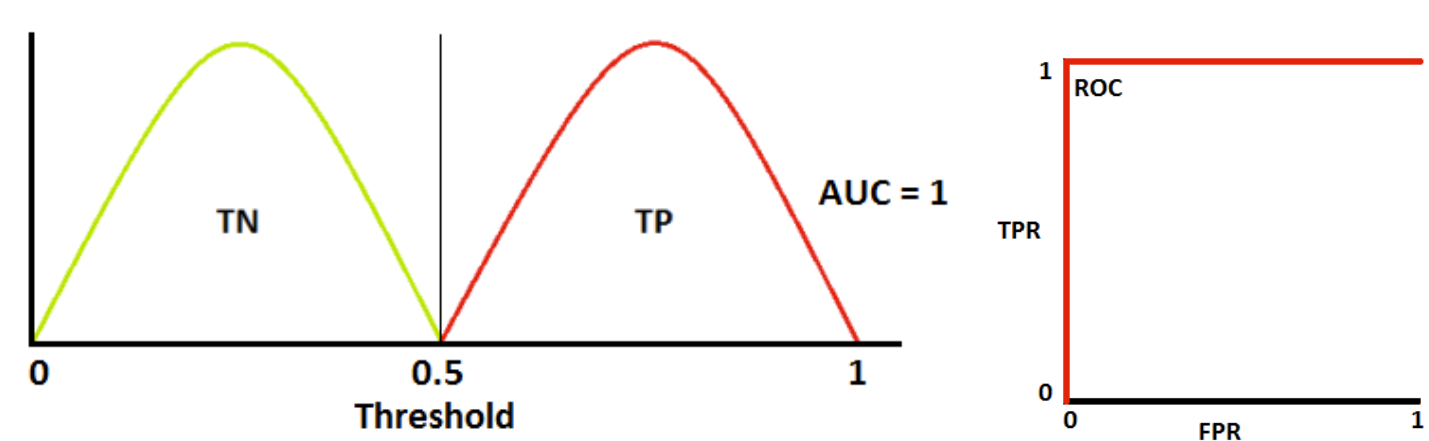

Por lo general el caso anterior es poco probable, y la mayoria de las veces ambas distribuciones interseccionan entre si. En ese caso el modelo no podrá clasificar correctamente ambas clases. Moviendo el 'threshold' (limite) de clasificacion, podemos elegir si preferimos reducir los Falsos Positivos o los Falsos negativos.<br>
La Curva ROC (Receiver Operating Characteristic) es una representación gráfica que se utiliza para evaluar el rendimiento de un modelo de clasificación binaria. Proporciona una forma de visualizar la capacidad de un modelo para discriminar entre las dos clases (clase positiva y clase negativa) a medida que varías el umbral de decisión.

La Curva ROC se crea al representar la Tasa de Verdaderos Positivos (TPR) en el eje y y la Tasa de Falsos Positivos (FPR) en el eje x. Estas tasas se definen de la siguiente manera:

Tasa de Verdaderos Positivos (TPR), también conocida como Sensibilidad o Recall: Es la proporción de ejemplos de la clase positiva que el modelo clasifica correctamente como positivos. Se calcula como TPR = TP / (TP + FN), donde TP son los verdaderos positivos y FN son los falsos negativos.

Tasa de Falsos Positivos (FPR): Es la proporción de ejemplos de la clase negativa que el modelo clasifica incorrectamente como positivos. Se calcula como FPR = FP / (FP + TN), donde FP son los falsos positivos y TN son los verdaderos negativos.

La Curva ROC muestra cómo varía la TPR y la FPR a medida que se ajusta el umbral de decisión del modelo. Idealmente, quieres que la TPR sea alta y la FPR sea baja, lo que significa que el modelo es bueno para distinguir entre las dos clases.

Una curva ROC típica se ve como una línea que se eleva hacia la esquina superior izquierda del gráfico. Cuanto más se acerca la curva ROC al punto (0,1), mejor es el rendimiento del modelo.

Además de la Curva ROC, se utiliza el Área bajo la Curva ROC (AUC-ROC) como una métrica cuantitativa para resumir el rendimiento del modelo. El AUC-ROC mide la capacidad de discriminación del modelo y cuantifica la probabilidad de que el modelo clasifique una instancia positiva seleccionada al azar más alta que una instancia negativa seleccionada al azar.

Recordemos que el threshold es la varible que nos permite decidir si el resultado de un clasificador sera 1 o 0 (por defecto se usa 0.5, pero se puede cambiar)<br><br>
En este caso, la curva ROC no sera perfecta y el valor del AUC (area bajo la curva) sera mejor a 1

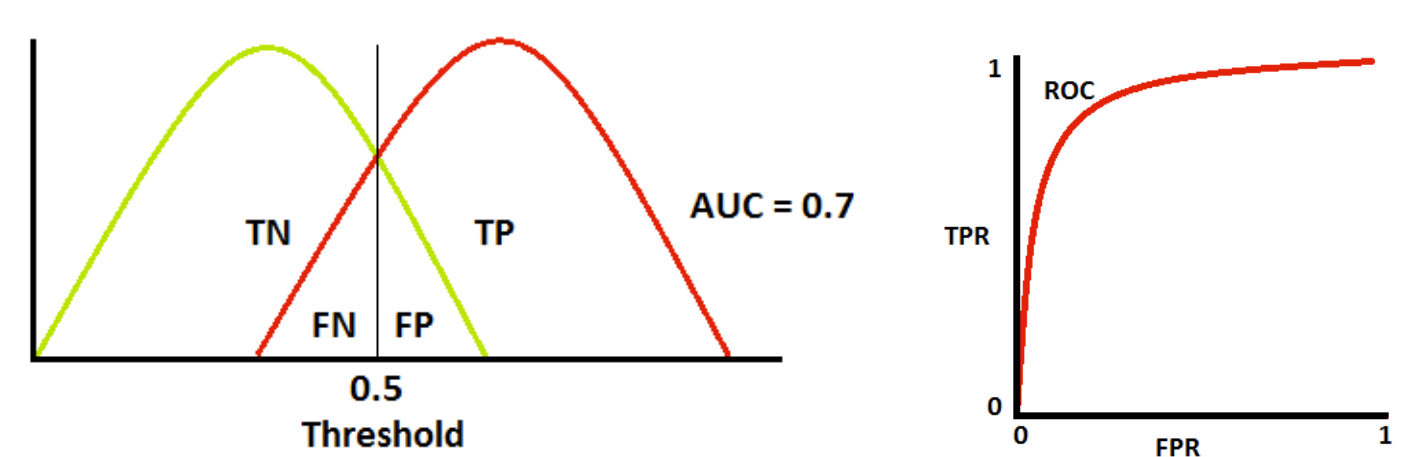

En el caso de que el modelo no sea capaz de diferenciar ninguna de las clases (es decir, ambas distribuciones sean exactamente iguales) en area bajo la curva (AUC) sera igual a 0.5 y la curva ROC sera una linea recta. Por lo general, se utiliza esta linea para comparar el modelo con el peor escenario

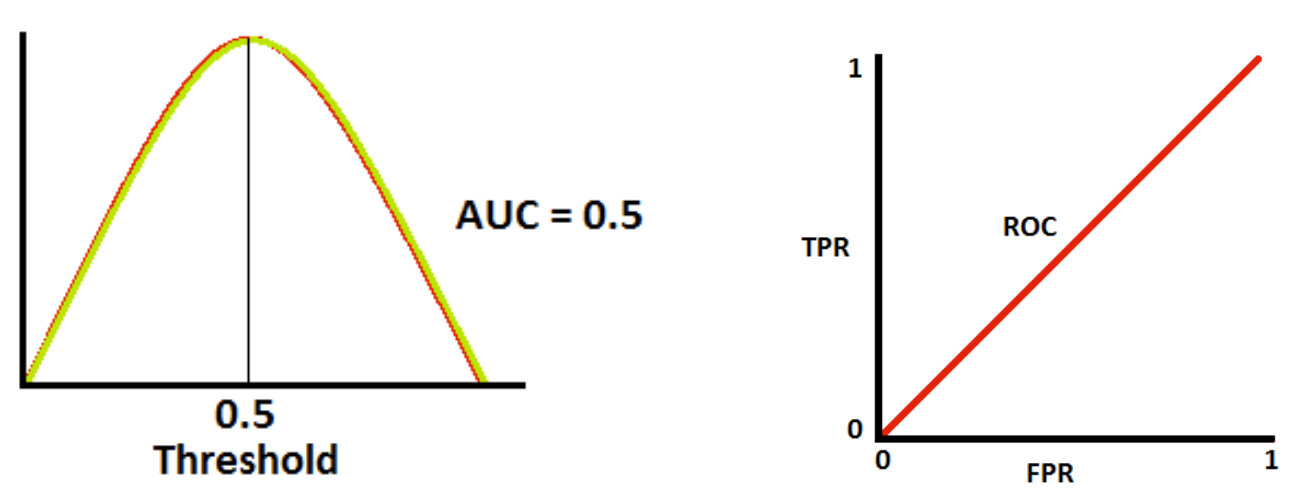

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def area_bajo_curva(clfs, nombres): # lista de clasificadores a graficar
  """
  Vamos a graficar el area bajo la curva (area under the curve - AUC) de la Característica Operativa del Receptor COR
  mejor conocido como ROC en ingles.
  la curva ROC nos permite ver el desempeño de la clasificacion de muestro modelo con diferentes umbrales de decision (por defecto se usa 0.5)
  """
  fpr = dict()
  tpr = dict()
  roc_auc = dict()

  plt.figure(figsize=(20,10))
  lw = 2
  plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', label='Base')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('Proporcion de Falsos Positivos')
  plt.ylabel('Proporcion de Verdaderos Positivos')
  plt.title('ROC ejemplo')

  for i, clf in enumerate(clfs):
    y_score = clf.predict(X_test)
    fpr[i], tpr[i], th = roc_curve(y_test, y_score)
    roc_auc[i] = auc(fpr[i], tpr[i])
    plt.plot(fpr[i], tpr[i], label='ROC %s (area = %0.2f)' % (nombres[i], roc_auc[i]))

  plt.legend(loc="lower right")

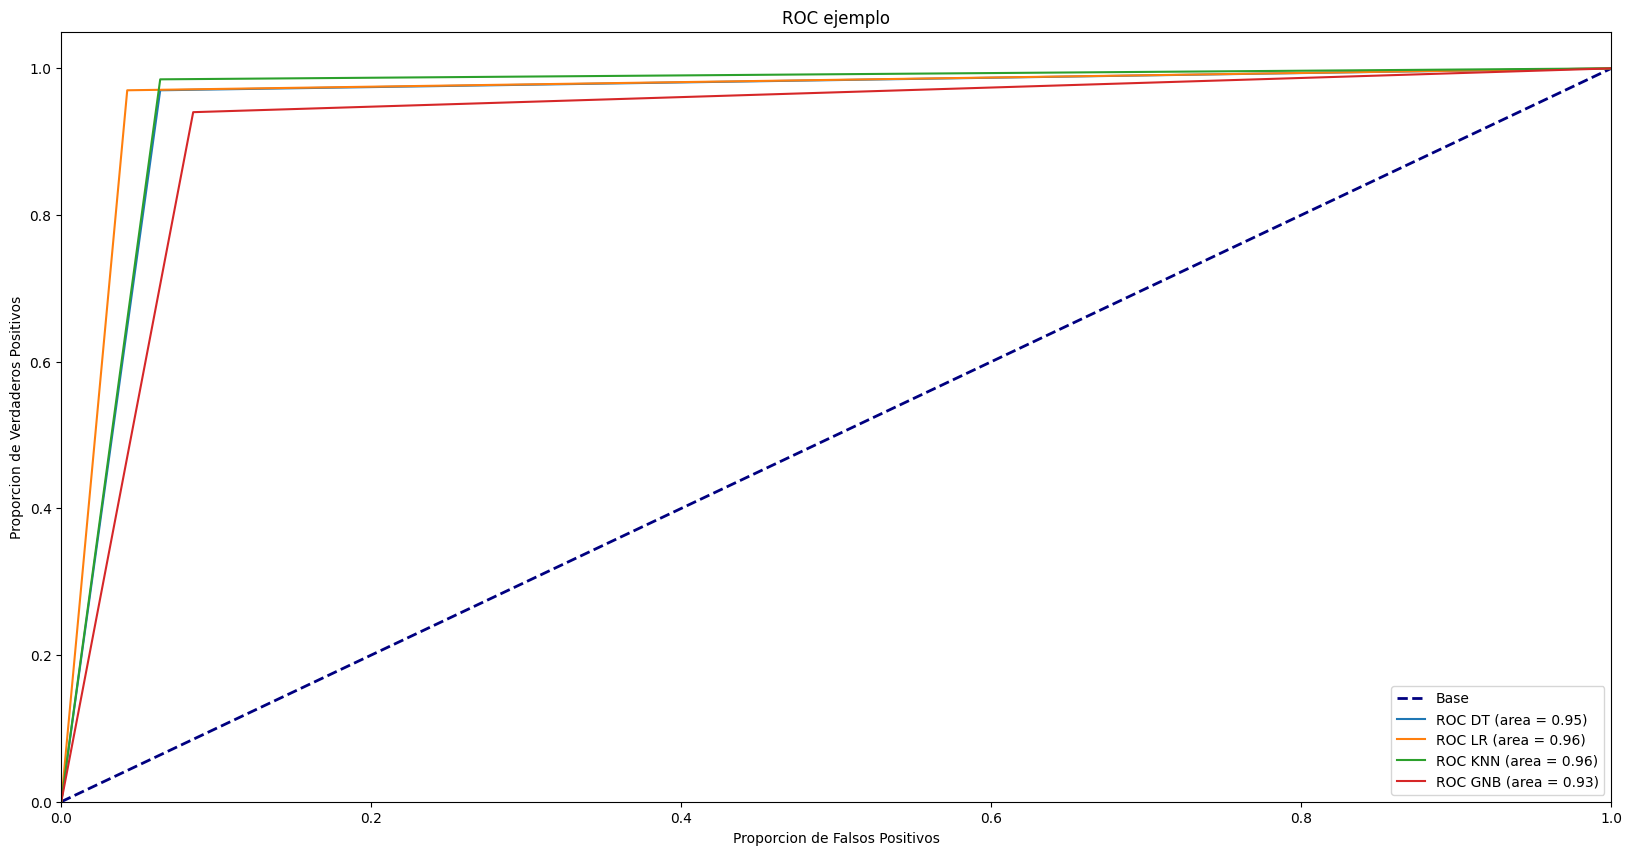

In [ ]:
area_bajo_curva([DT_clf_tuned, LR_clf_tuned, KNN_clf_tuned, GNB_clf_tuned], ['DT', 'LR', 'KNN', 'GNB'])